<a href="https://colab.research.google.com/github/Nelsonaos/Data_science/blob/main/EntregaFinal_OviedoNelso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Data Science CoderHouse 61755

Oviedo Nelso Entrega final

#Librerias


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Se realiza impor de librerias, para utilizarlas en apatir de ahora

## Import Data Set

In [ ]:
url = 'https://raw.githubusercontent.com/Nelsonaos/Data_science/main/Netflix%20Engagement%20Dataset.csv'

df = pd.read_csv(url)

df.head()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,1,50,10,4.32,8,Mobile,Romance,Oceania,On-Time,Premium,No,9,26,3307,Yes,2
1,2,40,5,4.45,3,Smart TV,Comedy,Asia,On-Time,Premium,No,6,27,7333,Yes,2
2,3,17,8,4.81,8,Laptop,Sci-fi,South America,On-Time,Basic,No,0,55,7527,Yes,3
3,4,59,10,2.67,10,Mobile,Action,Africa,On-Time,Basic,No,1,29,9934,Yes,3
4,5,5,7,4.20,9,Smart TV,Sci-fi,North America,On-Time,Standard,No,7,45,6242,Yes,3


In [ ]:
df.shape

(3500, 16)

In [ ]:
print(df.columns.tolist())

['Customer ID', 'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Churn Status (Yes/No)', 'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created']


## Diccionario de variables


 'Customer ID'
 'Subscription Length (Months)',
 'Customer Satisfaction Score (1-10)',
 'Daily Watch Time (Hours)',
'Engagement Rate (1-10)'
'Device Used Most Often',
'Genre Preference',
 'Region',
 'Payment History (On-Time/Delayed)',
 'Subscription Plan',
 'Churn Status (Yes/No)',
 'Support Queries Logged',
 'Age',
 'Monthly Income ($)',
 'Promotional Offers Used',
 'Number of Profiles Created'
  

In [ ]:
df.info()
df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         3500 non-null   int64  
 1   Subscription Length (Months)        3500 non-null   int64  
 2   Customer Satisfaction Score (1-10)  3500 non-null   int64  
 3   Daily Watch Time (Hours)            3500 non-null   float64
 4   Engagement Rate (1-10)              3500 non-null   int64  
 5   Device Used Most Often              3500 non-null   object 
 6   Genre Preference                    3500 non-null   object 
 7   Region                              3500 non-null   object 
 8   Payment History (On-Time/Delayed)   3500 non-null   object 
 9   Subscription Plan                   3500 non-null   object 
 10  Churn Status (Yes/No)               3500 non-null   object 
 11  Support Queries Logged              3500 no

array([[1, 50, 10, ..., 3307, 'Yes', 2],
       [2, 40, 5, ..., 7333, 'Yes', 2],
       [3, 17, 8, ..., 7527, 'Yes', 3],
       ...,
       [3498, 52, 7, ..., 6914, 'Yes', 2],
       [3499, 34, 5, ..., 6525, 'Yes', 3],
       [3500, 6, 5, ..., 9109, 'Yes', 2]], dtype=object)

In [ ]:
df.describe()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Number of Profiles Created
count,3500.000000,3500.0000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,30.5380,6.929714,3.509451,6.954286,5.023714,43.868286,5491.886857,3.018857
std,1010.507298,17.2591,2.666824,1.441229,2.671427,3.149011,15.323885,2575.005711,1.412875
min,1.000000,1.0000,1.000000,1.000000,1.000000,0.000000,18.000000,1010.000000,1.000000
25%,875.750000,16.0000,5.000000,2.250000,5.000000,2.000000,30.000000,3282.000000,2.000000
50%,1750.500000,31.0000,8.000000,3.510000,8.000000,5.000000,44.000000,5513.000000,3.000000
75%,2625.250000,45.0000,9.000000,4.740000,9.000000,8.000000,57.000000,7729.000000,4.000000
max,3500.000000,60.0000,10.000000,6.000000,10.000000,10.000000,70.000000,9990.000000,5.000000


A simple vista mirando la tabla ya podemos ir notando que tenemos varibales quie son categoricas, es decir que tienes valores predetarminados. Vamos a centrar nuestro analisis en la hipotesis sobre la prediccion  Churn Status (Yes/No)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3500.0,1750.500000,1010.507298,1.0,875.75,1750.50,2625.25,3500.0
Subscription Length (Months),3500.0,30.538000,17.259100,1.0,16.00,31.00,45.00,60.0
Customer Satisfaction Score (1-10),3500.0,6.929714,2.666824,1.0,5.00,8.00,9.00,10.0
Daily Watch Time (Hours),3500.0,3.509451,1.441229,1.0,2.25,3.51,4.74,6.0
Engagement Rate (1-10),3500.0,6.954286,2.671427,1.0,5.00,8.00,9.00,10.0
Support Queries Logged,3500.0,5.023714,3.149011,0.0,2.00,5.00,8.00,10.0
Age,3500.0,43.868286,15.323885,18.0,30.00,44.00,57.00,70.0
Monthly Income ($),3500.0,5491.886857,2575.005711,1010.0,3282.00,5513.00,7729.00,9990.0
Number of Profiles Created,3500.0,3.018857,1.412875,1.0,2.00,3.00,4.00,5.0


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Subscription Length (Months),0
Customer Satisfaction Score (1-10),0
Daily Watch Time (Hours),0
Engagement Rate (1-10),0
Device Used Most Often,0
Genre Preference,0
Region,0
Payment History (On-Time/Delayed),0
Subscription Plan,0


### Luego de la exploracion inicial se corrobora la no existencia de nulos por lo que porcedemos a trabajar con nuestro data set

### Graficacion y exploracion

En nuestra graficacion damos los primeros pasos en nuestra hiposteis planteada
¿Cuáles son las variable que influyen en la cancelación de clientes?

<ipython-input-9-4bcb5bfff569>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn Status (Yes/No)", palette="Set2")


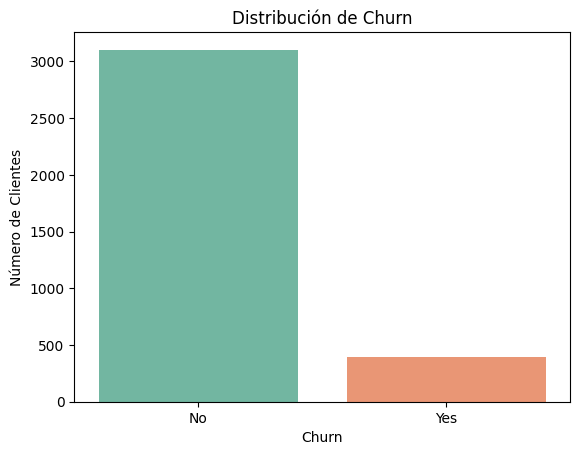

In [ ]:
sns.countplot(data=df, x="Churn Status (Yes/No)", palette="Set2")
plt.title("Distribución de Churn")
plt.xlabel("Churn")
plt.ylabel("Número de Clientes")
plt.show()


Nuestro primer grafico nos adelenta que tenemos valores desbalnaceados.En nuestra variable a predecir

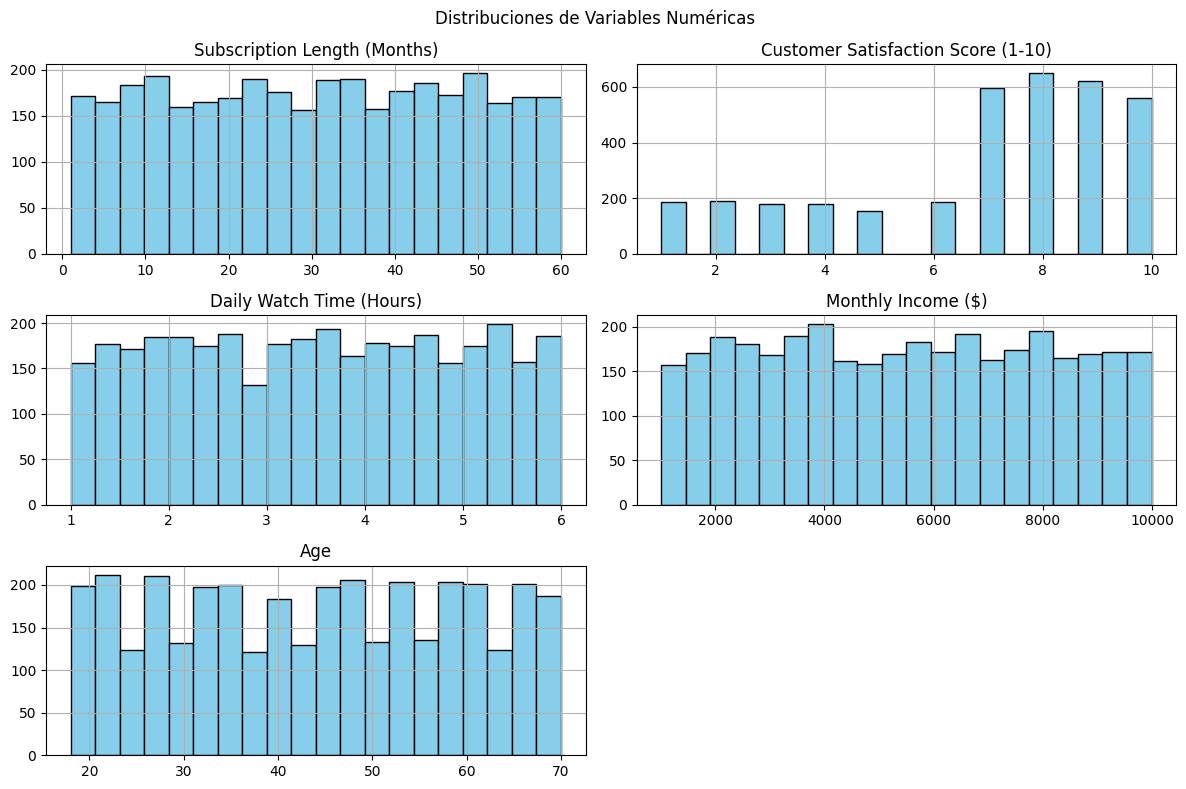

In [ ]:
numeric_cols = ['Subscription Length (Months)', 'Customer Satisfaction Score (1-10)',
                'Daily Watch Time (Hours)', 'Monthly Income ($)', 'Age']

df[numeric_cols].hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Distribuciones de Variables Numéricas")
plt.tight_layout()
plt.show()


Hacemos un analisis para ver las variables que pensamos y vemos son categoricas de valores numericos pre definidos

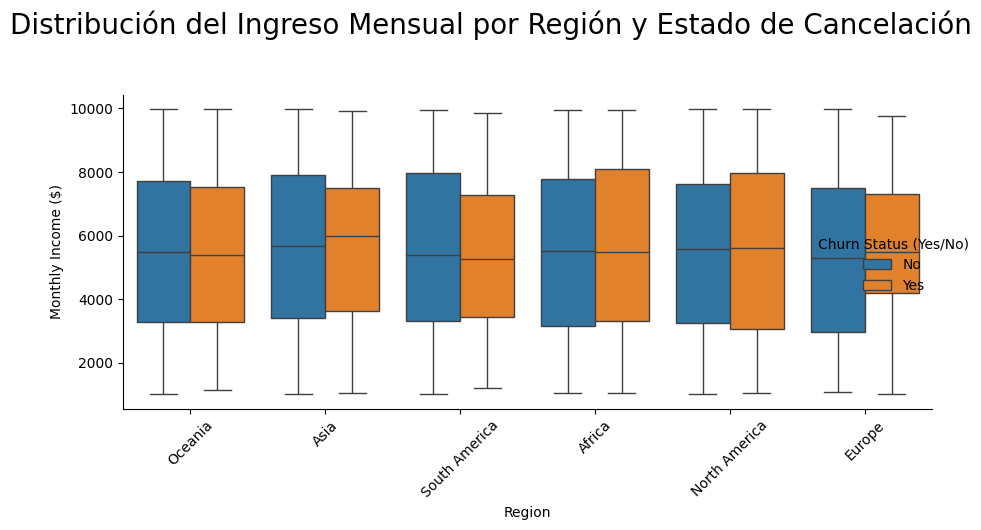

In [ ]:
g = sns.catplot(
    data=df,
    x="Region",
    y="Monthly Income ($)",
    hue="Churn Status (Yes/No)",
    kind="box",
    height=5,
    aspect=1.5
)

g.set_titles("Ingresos Mensuales por Región y Churn")
g.fig.suptitle("Distribución del Ingreso Mensual por Región y Estado de Cancelación", fontsize=20, y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

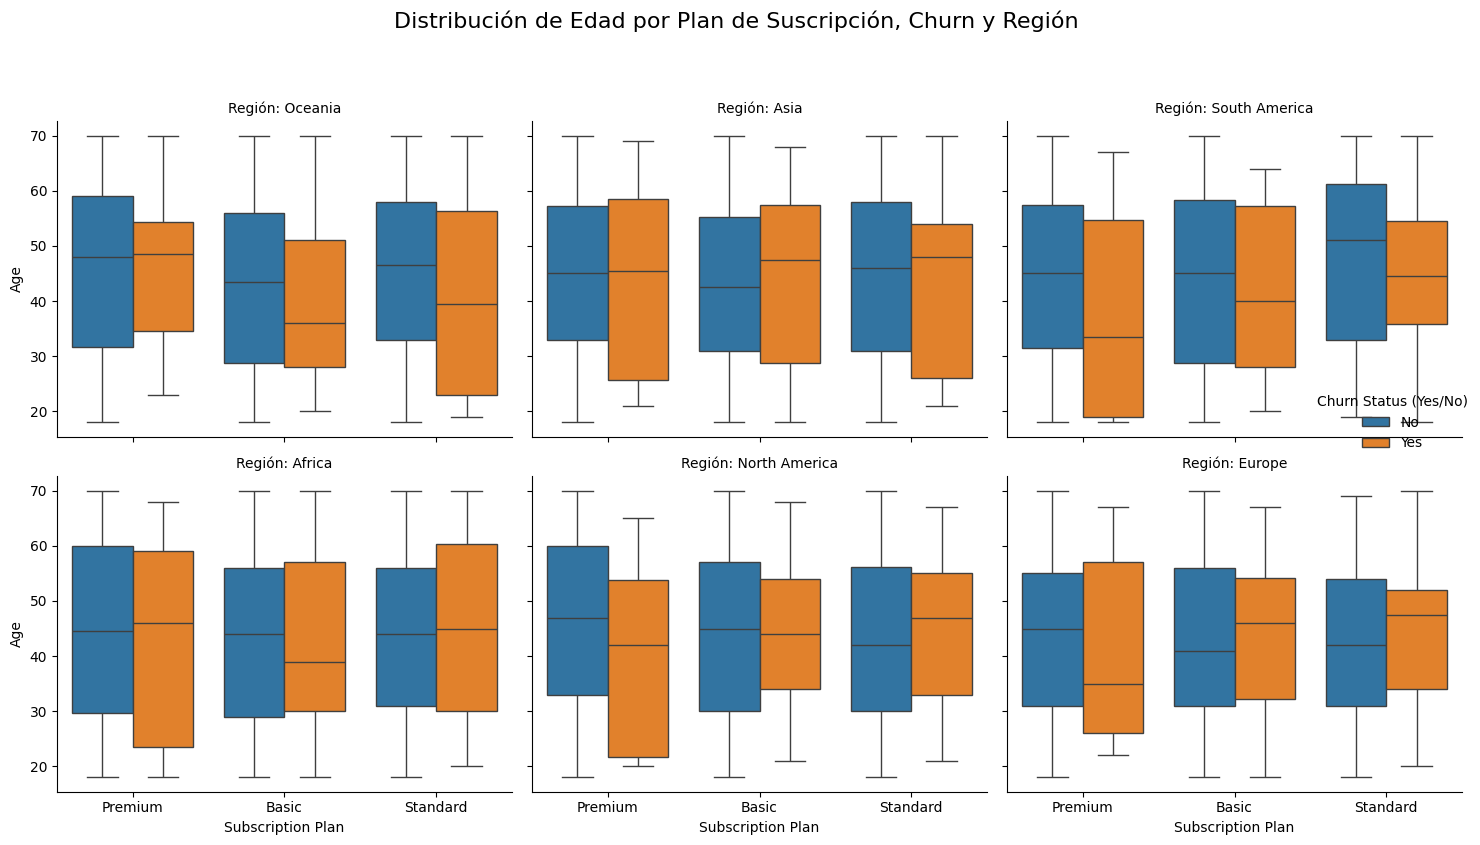

In [ ]:
g = sns.catplot(
    data=df,
    x="Subscription Plan",
    y="Age",
    hue="Churn Status (Yes/No)",
    kind="box",
    col="Region",
    col_wrap=3,
    height=4,
    aspect=1.1
)

g.set_titles("Región: {col_name}")
g.fig.suptitle("Distribución de Edad por Plan de Suscripción, Churn y Región", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

<ipython-input-13-425abfa695a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn Status (Yes/No)", y="Subscription Length (Months)", palette="Set1")


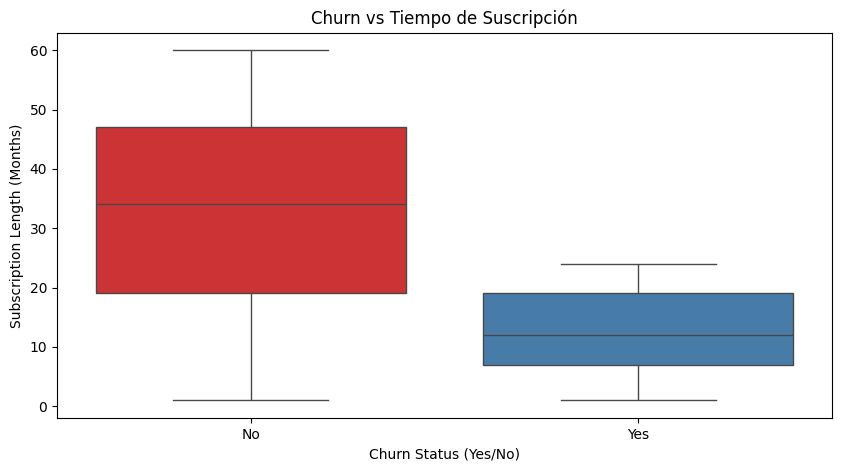

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Churn Status (Yes/No)", y="Subscription Length (Months)", palette="Set1")
plt.title("Churn vs Tiempo de Suscripción")
plt.show()


Buscamos determinar si el tiempo de suscripcion es una variable que influye :Los clientes que se han suscrito por un período más corto tienen estadísticamente más probabilidades de cancelar sus suscripciones.

<ipython-input-14-81e928863974>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn Status (Yes/No)", y="Customer Satisfaction Score (1-10)", palette="Set2")


<Axes: xlabel='Churn Status (Yes/No)', ylabel='Customer Satisfaction Score (1-10)'>

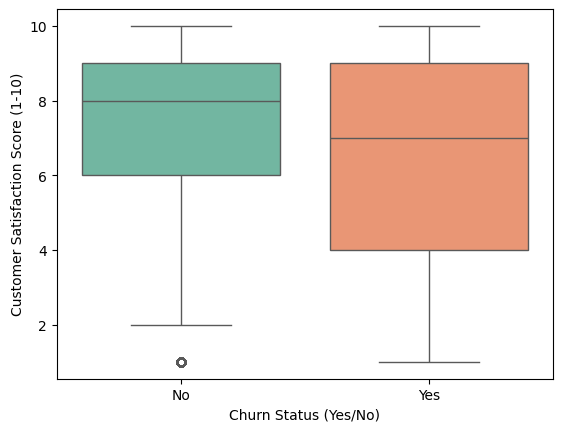

In [ ]:
sns.boxplot(data=df, x="Churn Status (Yes/No)", y="Customer Satisfaction Score (1-10)", palette="Set2")


En el grafico podemos ver que no es relativo el Churn es decir que la satifaccion no parece ser una variable que inlufye, Podemos deducir que a mayor tiempo de susbscripcion menos probabilidad de darse de baja

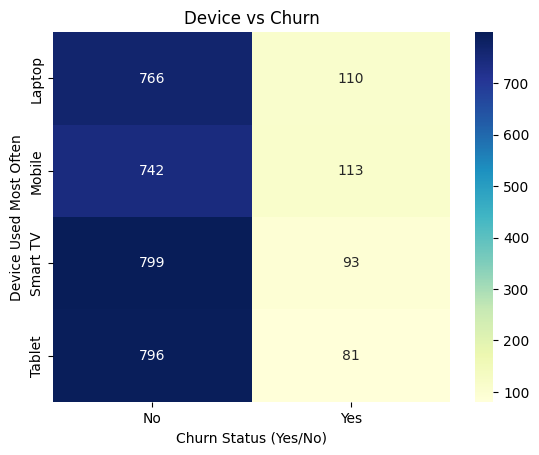

In [ ]:
crosstab = pd.crosstab(df["Device Used Most Often"], df["Churn Status (Yes/No)"])
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Device vs Churn")
plt.show()


En este grafico determinamos para el Churn nuestra variable principail por dispositivo


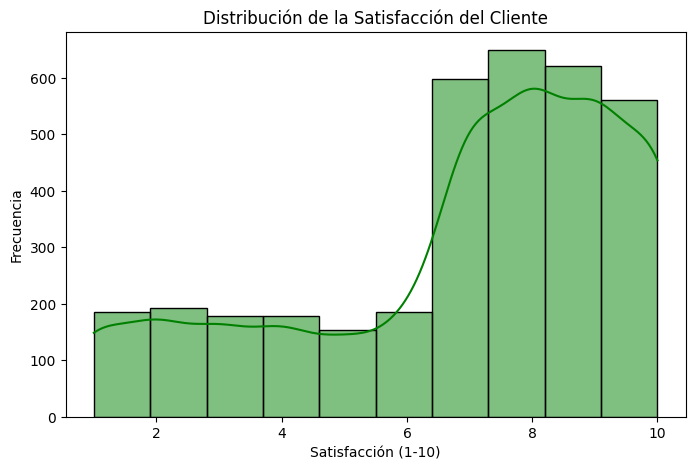

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Customer Satisfaction Score (1-10)"], bins=10, kde=True, color="green")
plt.title("Distribución de la Satisfacción del Cliente")
plt.xlabel("Satisfacción (1-10)")
plt.ylabel("Frecuencia")
plt.show()

Seguimos explorando, buscando mas datos para predecir, Podemos ver que a mayor frecuencia de uso notamos una mayor satifaccion

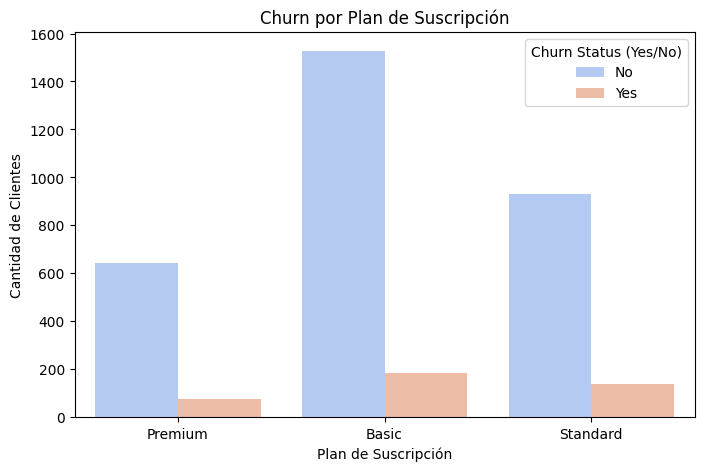

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Subscription Plan", hue="Churn Status (Yes/No)", palette="coolwarm")
plt.title("Churn por Plan de Suscripción")
plt.xlabel("Plan de Suscripción")
plt.ylabel("Cantidad de Clientes")
plt.show()


En primera instancia buscamos graficar la cantidad de clientes y el tipo de plan . Buscamos indentificar si existe un patron de en el plan a la hora de darse de baja

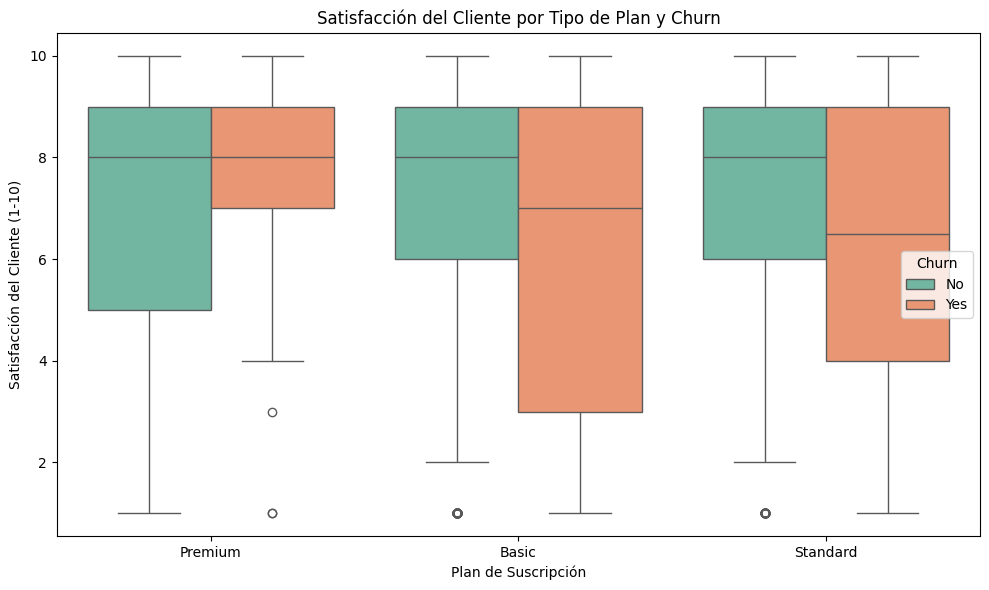

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x="Subscription Plan",
            y="Customer Satisfaction Score (1-10)",
            hue="Churn Status (Yes/No)",
            palette="Set2")

plt.title("Satisfacción del Cliente por Tipo de Plan y Churn")
plt.xlabel("Plan de Suscripción")
plt.ylabel("Satisfacción del Cliente (1-10)")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


<ipython-input-19-2ef0823ade64>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_bar,


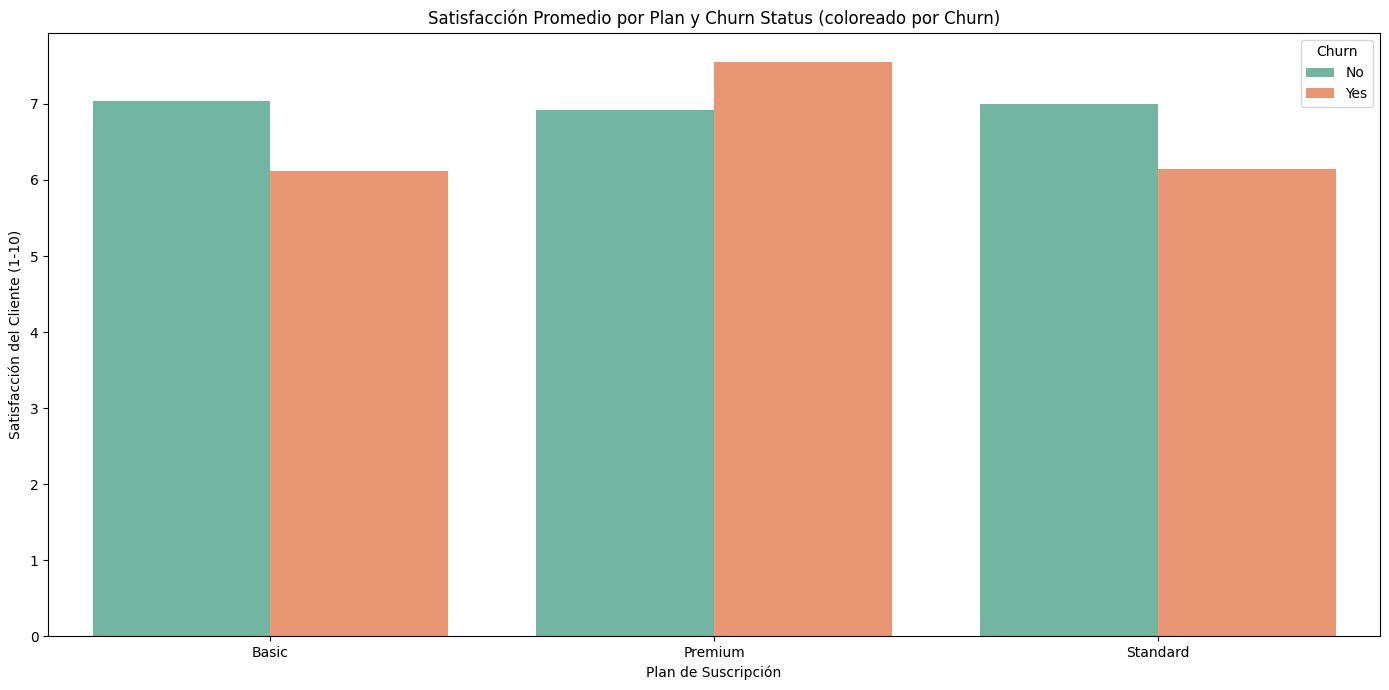

In [ ]:
# Agrupamos y calculamos la media de satisfacción
grouped_bar = df.groupby(["Subscription Plan", "Device Used Most Often", "Churn Status (Yes/No)"])["Customer Satisfaction Score (1-10)"].mean().reset_index()

# Gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_bar,
            x="Subscription Plan",
            y="Customer Satisfaction Score (1-10)",
            hue="Churn Status (Yes/No)",
            palette="Set2",
            ci=None)

# Ajustamos los detalles
plt.title("Satisfacción Promedio por Plan y Churn Status (coloreado por Churn)")
plt.ylabel("Satisfacción del Cliente (1-10)")
plt.xlabel("Plan de Suscripción")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()



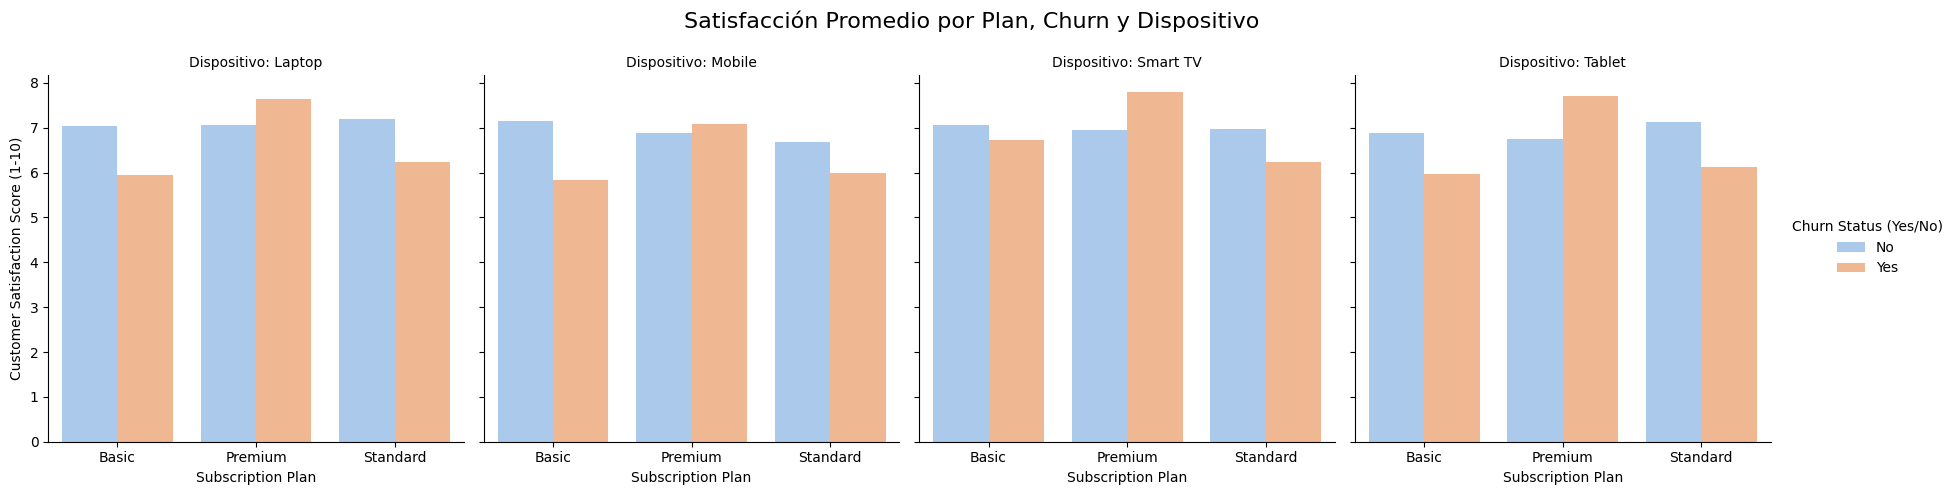

In [ ]:
# FacetGrid por dispositivo
g = sns.catplot(
    data=grouped_bar,
    x="Subscription Plan",
    y="Customer Satisfaction Score (1-10)",
    hue="Churn Status (Yes/No)",
    col="Device Used Most Often",
    kind="bar",
    palette="pastel",
    height=5,
    aspect=0.9
)

g.set_titles("Dispositivo: {col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Satisfacción Promedio por Plan, Churn y Dispositivo", fontsize=16)
plt.show()


In [ ]:
print("Columnas actuales:", df.columns.tolist())

Columnas actuales: ['Customer ID', 'Subscription Length (Months)', 'Customer Satisfaction Score (1-10)', 'Daily Watch Time (Hours)', 'Engagement Rate (1-10)', 'Device Used Most Often', 'Genre Preference', 'Region', 'Payment History (On-Time/Delayed)', 'Subscription Plan', 'Churn Status (Yes/No)', 'Support Queries Logged', 'Age', 'Monthly Income ($)', 'Promotional Offers Used', 'Number of Profiles Created']


In [ ]:
df.columns = df.columns.str.strip()  # Eliminar espacios en los nombres de columnas
# Eliminar columnas irrelevantes
df = df.drop(columns=["Customer ID"])  # No aporta información predictiva
# Codificar variables categóricas
categorical_cols = ["Device Used Most Often", "Genre Preference", "Region",
                    "Payment History (On-Time/Delayed)", "Subscription Plan",
                    "Promotional Offers Used"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Codificar la variable objetivo (Yes=1, No=0)
df["Churn Status (Yes/No)"] = df["Churn Status (Yes/No)"].map({"Yes": 1, "No": 0})

# Separar features y target
X = df.drop(columns=["Churn Status (Yes/No)"])
y = df["Churn Status (Yes/No)"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar datos numéricos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Configurar el modelo XGBoost

from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBClassifier(
    n_estimators=50,        # Menos árboles para evitar sobreajuste
    learning_rate=0.03,     # Aprendizaje más lento
    max_depth=2,            # Árboles más pequeños
    subsample=0.5,          # Menos datos por árbol
    colsample_bytree=0.5,   # Menos features por árbol
    min_child_weight=10,    # Evita divisiones innecesarias
    gamma=5,                # Penalización fuerte para evitar splits inútiles
    eval_metric="logloss",
    random_state=42
)


# Validación cruzada
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy:", np.mean(scores))

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred = xgb_model.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-Validation Accuracy: 0.8949999999999999
Accuracy: 0.8971428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       621
           1       1.00      0.09      0.16        79

    accuracy                           0.90       700
   macro avg       0.95      0.54      0.55       700
weighted avg       0.91      0.90      0.86       700

Confusion Matrix:
 [[621   0]
 [ 72   7]]


In [ ]:
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidad de churn
new_threshold = 0.25  # Reducimos el umbral
y_pred_adj = (y_pred_proba > new_threshold).astype(int)

print("Nuevo Classification Report:\n", classification_report(y_test, y_pred_adj))
print("Nueva Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adj))

Nuevo Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       621
           1       0.95      1.00      0.98        79

    accuracy                           0.99       700
   macro avg       0.98      1.00      0.99       700
weighted avg       0.99      0.99      0.99       700

Nueva Confusion Matrix:
 [[617   4]
 [  0  79]]
